In [ ]:
import os
import zipfile
from six.moves import urllib

FILE_NAME = "walmart-recruiting-store-sales-forecasting.zip" 
DATA_PATH ="datasets/walmart-recruiting-store-sales-forecasting" 
DATA_URL = "https://raw.githubusercontent.com/oneking777/r-learn/master/projects/" + FILE_NAME + "?raw=true"


def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_name=FILE_NAME):
    if not os.path.isdir(data_path): #查看当前文件夹下是否存在"datasets/titanic"，没有的话创建
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, file_name) #下载到本地的文件的路径及名称
    # urlretrieve()方法直接将远程数据下载到本地
    urllib.request.urlretrieve(data_url, zip_path) #第二个参数zip_path是保存到的本地路径
    data_zip = zipfile.ZipFile(zip_path)
    data_zip.extractall(path=data_path) 
    data_zip.close()
fetch_data()

## 读取数据并观察数据

In [1]:
import pandas as pd

train_df = pd.read_csv("datasets/walmart-recruiting-store-sales-forecasting/train.csv")
test_df = pd.read_csv("datasets/walmart-recruiting-store-sales-forecasting/test.csv")
features = pd.read_csv("datasets/walmart-recruiting-store-sales-forecasting/features.csv")
stores = pd.read_csv("datasets/walmart-recruiting-store-sales-forecasting/stores.csv")

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [2]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
test_df = test_df.merge(features, on=["Store", "Date", "IsHoliday"], how="left").merge(stores, on=["Store"], how="left")
train_df = train_df.merge(features, on=["Store", "Date", "IsHoliday"], how="left").merge(stores, on=["Store"], how="left")
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
Type            115064 non-null object
Size            115064 non-null int64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [8]:
train_df.describe(include="O")

,Date,Type
count,421570,421570
unique,143,3
top,2011-12-23,A
freq,3027,215478


 查看特征之间的关系

In [9]:
corr_mx = train_df.corr()
corr_mx["Weekly_Sales"].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [10]:
# 查看5个markdown之间的关系  "MarkDown1"和"MarkDown4"之间的相关系数较大，删一个
corr_mx[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].sort_values(ascending=False, by="MarkDown1")

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
MarkDown1,1.000000,0.024486,-0.108115,0.819238,0.160257
MarkDown4,0.819238,-0.007768,-0.071095,1.000000,0.107792
Size,0.345673,0.108827,0.048913,0.168196,0.304575
MarkDown5,0.160257,-0.007440,-0.026467,0.107792,1.000000
Weekly_Sales,0.085251,0.024130,0.060385,0.045414,0.090362
Fuel_Price,0.061371,-0.220895,-0.102092,-0.044986,-0.128065
Unemployment,0.050285,0.020940,0.012818,0.024963,-0.003843
MarkDown2,0.024486,1.000000,-0.050108,-0.007768,-0.007440
Dept,-0.002426,0.000290,0.001784,0.004257,0.000109
IsHoliday,-0.035586,0.334818,0.427960,-0.000562,-0.053719


## 数据清洗

缺失值处理

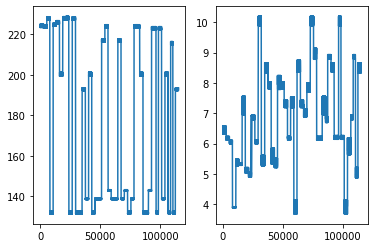

In [34]:
# "CPI", "Unemployment" 
import matplotlib.pyplot as plt

fig = plt.figure()
ax1, ax2 = fig.subplots(1, 2)
ax1.plot(range(len(test_df["CPI"])), test_df["CPI"])
ax2.plot(range(len(test_df["Unemployment"])), test_df["Unemployment"])
plt.show()

In [12]:
# 训练集的markdown最后处理
test_df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown5"]] = \
    test_df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown5"]].fillna(0)
test_df[["CPI", "Unemployment"]] = test_df[["CPI", "Unemployment"]].fillna(method="ffill")

In [13]:
test_df.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       115064 non-null float64
MarkDown2       115064 non-null float64
MarkDown3       115064 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             115064 non-null float64
Unemployment    115064 non-null float64
Type            115064 non-null object
Size            115064 non-null int64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


特征处理

In [14]:
# "Type" --->onehot
train_df = pd.get_dummies(train_df, columns=["Type"])
test_df = pd.get_dummies(test_df, columns=["Type"])
test_df.loc[0]

Store                    1
Dept                     1
Date            2012-11-02
IsHoliday            False
Temperature          55.32
Fuel_Price           3.386
MarkDown1          6766.44
MarkDown2           5147.7
MarkDown3            50.82
MarkDown4           3639.9
MarkDown5          2737.42
CPI                223.463
Unemployment         6.573
Size                151315
Type_A                   1
Type_B                   0
Type_C                   0
Name: 0, dtype: object

In [15]:
# 日期换成月份  过会删除"Date"
train_df["Month"] = pd.to_datetime(train_df["Date"]).dt.month
test_df["Month"] = pd.to_datetime(train_df["Date"]).dt.month

In [16]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,1,0,0,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315,1,0,0,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,151315,1,0,0,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,151315,1,0,0,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,151315,1,0,0,3


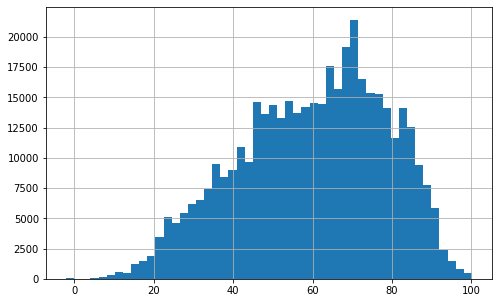

In [17]:
# "Temperature" 可能会影响销售额
train_df["Temperature"].hist(bins=50, figsize=(8, 5))

In [18]:
# 把数据分成两组：小于20.0，大于90.0
train_df.loc[(train_df["Temperature"] <20.0) | (train_df["Temperature"] > 90.0), "Is_temp_extr"] = 1
train_df.loc[(train_df["Temperature"] >=20.0) & (train_df["Temperature"] <= 90.0), "Is_temp_extr"] = 0

test_df.loc[(test_df["Temperature"] <20.0) | (test_df["Temperature"] > 90.0), "Is_temp_extr"] = 1
test_df.loc[(test_df["Temperature"] >=20.0) & (test_df["Temperature"] <= 90.0), "Is_temp_extr"] = 0

train_df.corr().Weekly_Sales.sort_values(ascending=False)[["Temperature", "Is_temp_extr"]]

Temperature    -0.002312
Is_temp_extr   -0.026085
Name: Weekly_Sales, dtype: float64

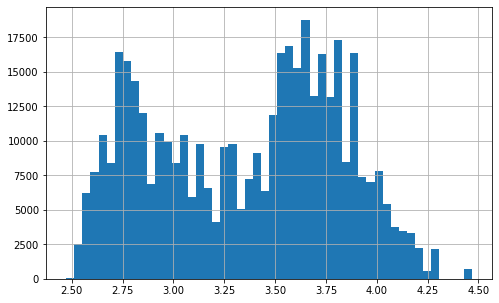

In [19]:
# "Fuel_Price"  应该不太会影响到销售额
train_df["Fuel_Price"].hist(bins=50, figsize=(8, 5))

In [20]:
train_df.loc[train_df["Fuel_Price"]>3.47, "Is_fuel_expen"]=1
train_df.loc[train_df["Fuel_Price"]<=3.47, "Is_fuel_expen"]=0
#无论怎么改，这个相关性都很低，所以这个特征等下去除
train_df.corr().Weekly_Sales.sort_values(ascending=False)[["Fuel_Price", "Is_fuel_expen"]]

Fuel_Price      -0.000120
Is_fuel_expen   -0.006626
Name: Weekly_Sales, dtype: float64

In [21]:
# IsHoliday  把bool值换成0和5(后面权重）
train_df["IsHoliday"] = train_df["IsHoliday"].replace(True, 5).replace(False, 0)

In [22]:
# 删除前面多余的特征
train_df = train_df.drop(['MarkDown4',"Date", "Temperature", "Fuel_Price","Is_fuel_expen"], axis=1)

#这是后面提交表格需要用到的变量，用到了测试集的date特征，先在这里给id变量赋值，然后就可以吧date特征删除了
id = test_df["Store"].astype(str)+"_"+test_df["Dept"].astype(str)+"_"+test_df["Date"].astype(str)
test_df = test_df.drop(["MarkDown4", "Date","Temperature", "Fuel_Price"], axis=1) 

In [23]:
# 数据用于算法前的最终检查
# 数据做成两份，一份markdown以0填充， 另一份drop
train_df_one = train_df.copy()
train_df_two = train_df.copy()
train_df_one[['MarkDown1','MarkDown2','MarkDown3','MarkDown5']] = \
    train_df_one[['MarkDown1','MarkDown2','MarkDown3','MarkDown5']].fillna(0)
train_df_two.dropna(inplace=True)

train_df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Size            421570 non-null int64
Type_A          421570 non-null uint8
Type_B          421570 non-null uint8
Type_C          421570 non-null uint8
Month           421570 non-null int64
Is_temp_extr    421570 non-null float64
dtypes: float64(9), int64(4), uint8(3)
memory usage: 46.2 MB


In [24]:
train_df_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101480 entries, 92 to 421569
Data columns (total 16 columns):
Store           101480 non-null int64
Dept            101480 non-null int64
Weekly_Sales    101480 non-null float64
IsHoliday       101480 non-null float64
MarkDown1       101480 non-null float64
MarkDown2       101480 non-null float64
MarkDown3       101480 non-null float64
MarkDown5       101480 non-null float64
CPI             101480 non-null float64
Unemployment    101480 non-null float64
Size            101480 non-null int64
Type_A          101480 non-null uint8
Type_B          101480 non-null uint8
Type_C          101480 non-null uint8
Month           101480 non-null int64
Is_temp_extr    101480 non-null float64
dtypes: float64(9), int64(4), uint8(3)
memory usage: 11.1 MB


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
IsHoliday       115064 non-null bool
MarkDown1       115064 non-null float64
MarkDown2       115064 non-null float64
MarkDown3       115064 non-null float64
MarkDown5       115064 non-null float64
CPI             115064 non-null float64
Unemployment    115064 non-null float64
Size            115064 non-null int64
Type_A          115064 non-null uint8
Type_B          115064 non-null uint8
Type_C          115064 non-null uint8
Month           115064 non-null int64
Is_temp_extr    115064 non-null float64
dtypes: bool(1), float64(7), int64(4), uint8(3)
memory usage: 16.0 MB


## 模型和预测

In [31]:
import time
import os
from sklearn.metrics import mean_absolute_error
from sklearn.base import clone

class Tester():
    def __init__(self, target):
        self.target = target
        self.datasets = {}
        self.models = {}
        self.scores = {}
        self.cache = {} # 我们添加了一个简单的缓存来加快速度

    def addDataset(self, name, df):
        self.datasets[name] = df.copy()

    def addModel(self, name, model):
        self.models[name] = model
        
    def clearModels(self):
        self.models = {}

    def clearCache(self):
        self.cache = {}
    
    def testModelWithDataset(self, m_name, df_name, sample_len, cv):
        if (m_name, df_name, sample_len, cv) in self.cache:
            return self.cache[(m_name, df_name, sample_len, cv)]

        clf = clone(self.models[m_name])
        
        if not sample_len: 
            sample = self.datasets[df_name]
        else: 
            sample = self.datasets[df_name].sample(sample_len)
            
        X = sample.drop([self.target], axis=1)
        Y = sample[self.target]

        weights = X["IsHoliday"]
        clf.fit(X, Y)
        Y_pred = clf.predict(X)
        s = mean_absolute_error(Y, Y_pred, sample_weight=weights)
        self.cache[(m_name, df_name, sample_len, cv)] = s

        return s

    def runTests(self, sample_len=97056, cv=3):
        # 在所有添加的数据集上测试添加的模型
        for m_name in self.models:
            for df_name in self.datasets:
#                 print('Testing %s' % str((m_name, df_name)), end='')
                start = time.time()

                score = self.testModelWithDataset(m_name, df_name, sample_len, cv)
                self.scores[(m_name, df_name)] = score
                
                end = time.time()
                
#                 print(' -- %0.2fs ' % (end - start))

        print('--- Top 10 Results ---')

        for score in sorted(self.scores.items(), key=lambda x: x[1])[:10]:
#             score = int(score[1])
            print(score)

    def obtian_result(self, X_test):
        clf = self.models[sorted(self.scores.items(), key=lambda x: x[1])[0][0]]
        Y_pred = clf.predict(X_test)
        return Y_pred

In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor

# 我们将在所有模型中使用测试对象
tester = Tester('Weekly_Sales')

# 添加数据集
tester.addDataset('all_markdown', train_df_one)
tester.addDataset('wipe_markdown', train_df_two)

# 添加模型
knn_reg = KNeighborsRegressor(n_neighbors=10)
tree_reg = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
rf_reg = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=3)
gbrt_reg = GradientBoostingRegressor(max_depth=8, warm_start=True)
tester.addModel('KNeighborsRegressor', knn_reg)
tester.addModel('RandomForestRegressor', rf_reg)
tester.addModel('MLPRegressor', mlp_reg)
tester.addModel('GradientBoostingRegressor', gbrt_reg)

# 测试
tester.runTests()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished


Iteration 1, loss = 488653746.81779301
Iteration 2, loss = 249421954.42714974
Iteration 3, loss = 248880540.22156957
Iteration 4, loss = 248736930.68067506
Iteration 5, loss = 248707460.36747256
Iteration 6, loss = 248668801.47903389
Iteration 7, loss = 248579095.02172047
Iteration 8, loss = 248553373.39550403
Iteration 9, loss = 248514317.42416501
Iteration 10, loss = 248414830.05565813
Iteration 11, loss = 248427565.04104912
Iteration 12, loss = 248322046.53136519
Iteration 13, loss = 248208542.45967510
Iteration 14, loss = 248124718.48993486
Iteration 15, loss = 248015170.82965216
Iteration 16, loss = 248015452.97959396
Iteration 17, loss = 247830226.88844556
Iteration 18, loss = 247763108.48354083
Iteration 19, loss = 247629028.16911077
Iteration 20, loss = 247642209.73114100
Iteration 21, loss = 247425614.88395125
Iteration 22, loss = 247276974.24696895
Iteration 23, loss = 247142435.54858363
Iteration 24, loss = 247053056.33702829
Iteration 25, loss = 247038703.07891235
Iteration

Iteration 79, loss = 278614076.74324203
Iteration 80, loss = 278625332.15517622
Iteration 81, loss = 278541777.41891181
Iteration 82, loss = 278448881.23569727
Iteration 83, loss = 278480213.07105613
Iteration 84, loss = 278309468.71627247
Iteration 85, loss = 278271607.99154264
Iteration 86, loss = 278180682.46706462
Iteration 87, loss = 278146898.73519224
Iteration 88, loss = 278366417.08077776
Iteration 89, loss = 278021852.02329713
Iteration 90, loss = 278033768.64541233
Iteration 91, loss = 278049035.41006905
Iteration 92, loss = 278145835.04149932
Iteration 93, loss = 277948977.95962340
Iteration 94, loss = 278004088.33568341
Iteration 95, loss = 278015633.00521308
Iteration 96, loss = 278264516.23502576
Iteration 97, loss = 278037449.05600256
Iteration 98, loss = 277997810.88541883
Iteration 99, loss = 277979868.88125700
Iteration 100, loss = 277881903.16860282
Iteration 101, loss = 277716849.48588365
Iteration 102, loss = 277590272.37400931
Iteration 103, loss = 277693855.28466

In [33]:
X = train_df_one.drop(["Weekly_Sales"], axis=1)
Y = train_df_one["Weekly_Sales"]

gbrt_reg.fit(X, Y)
Y_pred = gbrt_reg.predict(test_df)
submission = pd.DataFrame({
        "Id": id,
        "Weekly_Sales": pd.DataFrame(Y_pred)[0]
    })
id

submission.to_csv('submission.csv', index=False)